In [23]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy.stats import beta
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import defaultdict

# plt.style.use('seaborn-darkgrid')
# plt.style.use('ggplot')
rcParams['figure.figsize'] = 10, 5

In [24]:
class Simulation:
    def __init__(self):
        self.nodes = []
        self.edges = []

In [25]:
class Agent:
    def __init__(self, id, alpha=2, beta=2):
        self.id = id
        self.alpha = alpha
        self.beta  = beta
        
    def __str__(self):
        return "id: %s, alpha: %s, beta: %s" % (self.id, self.alpha, self.beta)
#         return str(self.id)
    
    def __repr__(self):
        return "id: %s, alpha: %s, beta: %s" % (self.id, self.alpha, self.beta)
#         return str(self.id)
        
def beta_mode(alpha, beta):
    mode = (alpha - 1) / (alpha + beta - 2)
#         print(mode)
    return mode

In [26]:
def make_agent_graph(input_graph):
    G = nx.Graph()
    # bx_node = {u:d for u,d in bt.nodes(data=True)}
    bx_node = [(u, d) for (u,d) in input_graph.nodes(data=True)]
    mt = defaultdict() #mapping table
    for item in bx_node:
        node_id = item[0]
        node = Agent(node_id, alpha=np.random.randint(2,4), beta=np.random.randint(2,4))
        mt[node_id] = node
        
        G.add_node(node)

    bx_edge = [(mt[u], mt[v], d) for (u,v,d) in input_graph.edges(data=True)]
    G.add_edges_from(bx_edge)
    return G

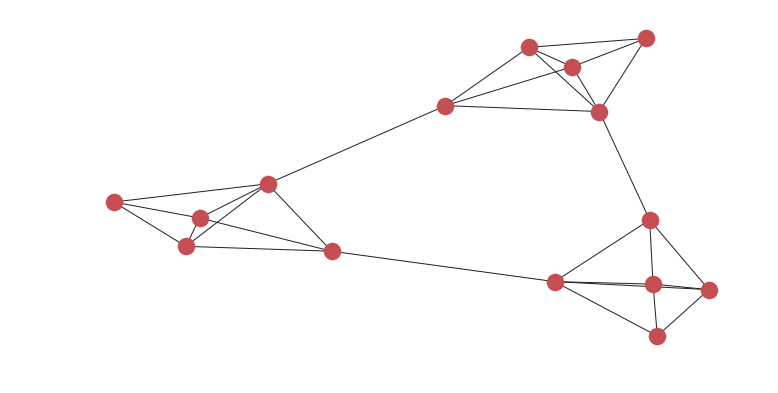

In [34]:
G = nx.connected_caveman_graph(3,5)
H = make_agent_graph(G)

nx.draw(H)

In [37]:
def draw_network(G):
    #TODO: transparency based on distribution variance
    labels = {u:u.id for u in G.nodes()}
    modes = [beta_mode(u.alpha, u.beta) for (u,d) in G.nodes(data=True)]
    fig, ax = plt.subplots()
    ax.axis('off')
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=400, alpha=0.8,
                           node_color=modes, cmap=plt.cm.cool)


    nx.draw_networkx_edges(G, pos, edge_color='w')
    nx.draw_networkx_labels(G,pos,labels,font_size=14)
    plt.show()


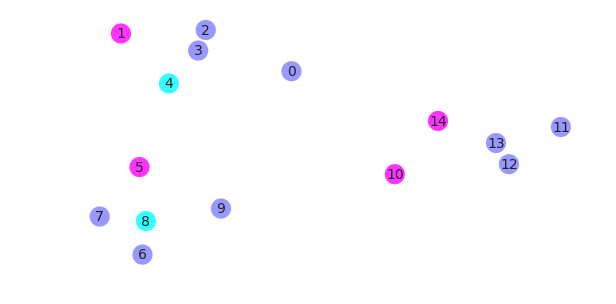

In [38]:
draw_network(H)

In [22]:
print(plt.style.available)


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [ ]:
np.random.randint(2,4)

In [ ]:
sns.palplot(sns.color_palette("RdBu", 10))

In [ ]:
sns.palplot(sns.diverging_palette(240, 10, n=9))

In [ ]:
plt.cm.Blues

In [ ]:
G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

In [ ]:
labels